In [45]:
import pandas as pd
from datetime import *
import os,time

ts_code='601668.SH'
basic_path='data/history/basic'
daily_path='data/history/daily'
weekly_path='data/history/weekly'
df = pd.read_csv('%s/%s.csv'%(weekly_path, ts_code), parse_dates=['trade_date'], index_col='trade_date')
#df_weekly.describe()
df.head()

,ts_code,close,open,high,low,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2019-02-22,601668.SH,6.03,6.07,6.15,5.92,6.03,0.00,0.0000,8583010.20,5193262.058
2019-02-15,601668.SH,6.03,6.10,6.25,6.01,6.13,-0.10,-1.6313,5720655.61,3506567.599
2019-02-01,601668.SH,6.13,6.11,6.18,6.01,6.05,0.08,1.3223,4271925.85,2606913.853
2019-01-25,601668.SH,6.05,5.97,6.10,5.82,5.98,0.07,1.1706,4271748.34,2548166.008
2019-01-18,601668.SH,5.98,5.68,5.98,5.64,5.69,0.29,5.0967,4060658.48,2356086.576


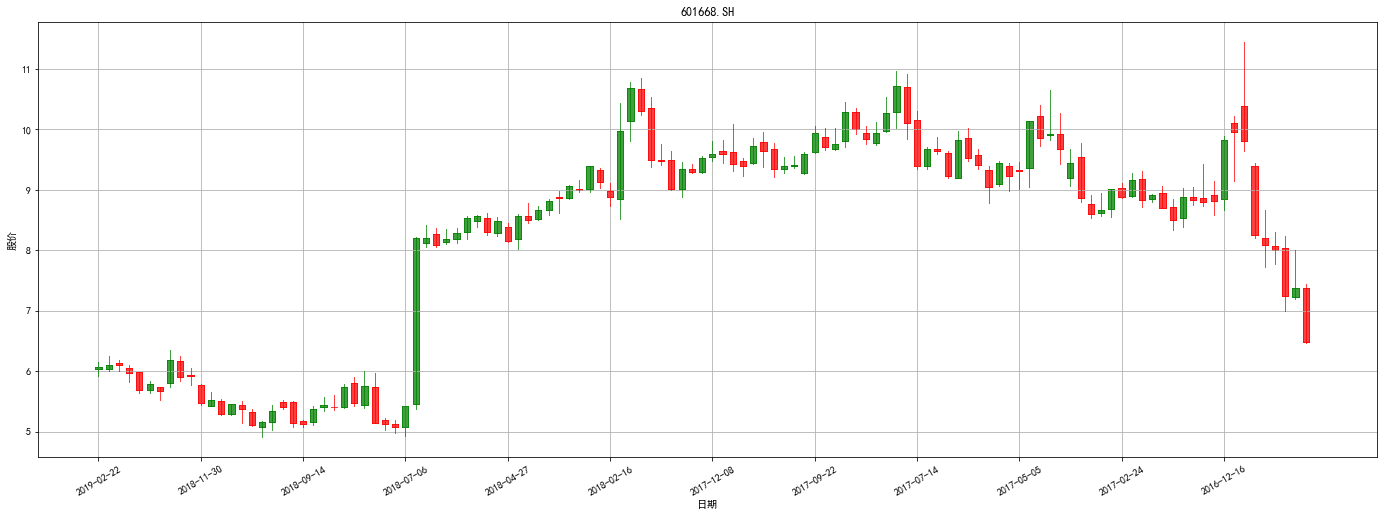

In [46]:
#将格式转换为mpf.candlestick_ohlc()能够处理的浮点数格式
import matplotlib.pyplot as plt
import mpl_finance as mpf
from matplotlib.pylab import date2num
import datetime

plt.rcParams['font.sans-serif']=['SimHei']

df.index = df.index.format(formatter=lambda x: x.strftime('%Y-%m-%d'))
#fig = plt.figure(figsize=(24, 8))
fig, ax = plt.subplots(figsize=(24, 8))
plt.grid(True)
plt.title('601668.SH')
plt.xlabel('日期')
plt.ylabel('股价')
ax.set_xticks(range(0, len(df.index), 10))
ax.set_xticklabels(df.index[::10])
# 设置日期刻度旋转的角度 
plt.xticks(rotation=30)
mpf.candlestick2_ochl(ax, df['open'], df['close'], df['high'], df['low'], 
                      width=0.6, colorup='r', colordown='g', alpha=0.75); 
#plt.show()

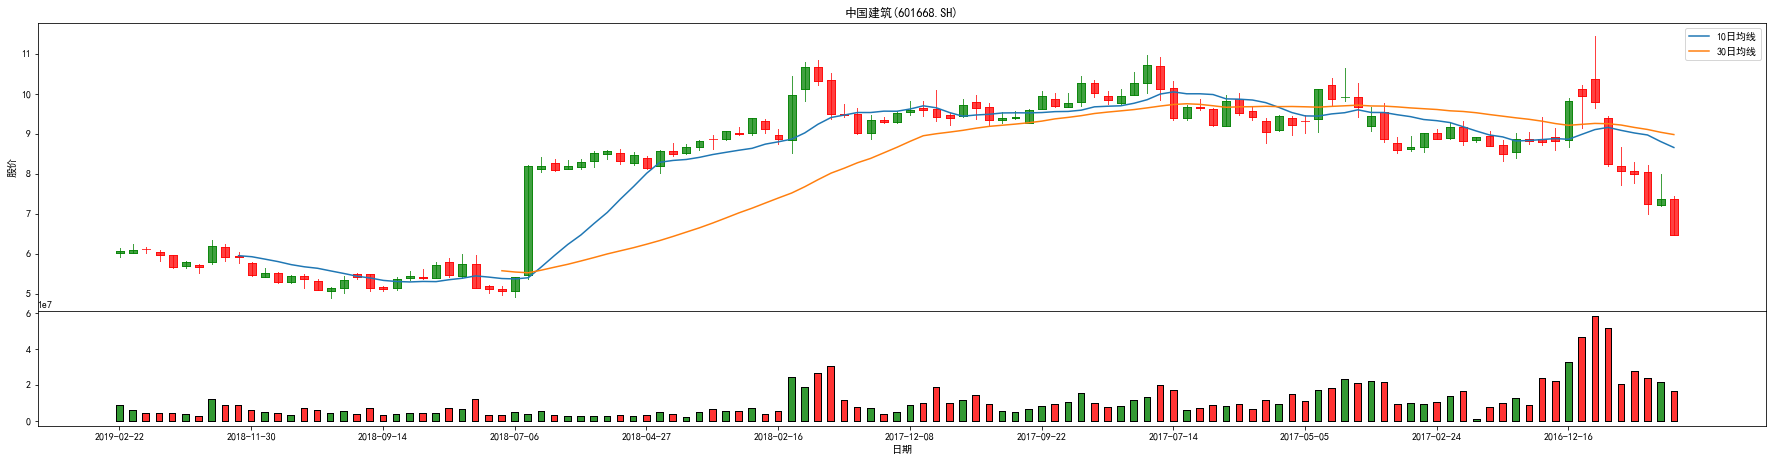

In [6]:
# 添加均线及成交量
import talib
import numpy as np
sma_10 = talib.SMA(np.array(df['close']), 10)
sma_30 = talib.SMA(np.array(df['close']), 30)

fig = plt.figure(figsize=(24, 8))
ax = fig.add_axes([0,0.2,1,0.5])
ax2 = fig.add_axes([0,0,1,0.2])
ax.set_xticks(range(0, len(df.index), 10))
ax.set_xticklabels(df.index[::10])
mpf.candlestick2_ochl(ax, df['open'], df['close'], df['high'],
                      df['low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
ax.plot(sma_10, label='10日均线')
ax.plot(sma_30, label='30日均线')
ax.set_title('中国建筑(601668.SH)')
ax.set_ylabel('股价')

mpf.volume_overlay(ax2, df['open'], df['close'], df['vol'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax2.set_xticks(range(0, len(df.index), 10))
ax2.set_xticklabels(df.index[::10])
ax2.set_xlabel('日期')
ax.legend();

# 添加KD指标
## 公式：
未成熟随机值(RSV)：(今日收盘价 - 最近9天的最低价) / (最近9天最高价 - 最近9天的最低价)
当日K值：前日K值 * (2/3) + 当日RSV值 * (1/3)
当日D值：前日D值 * (2/3) + 当日K值 * (1/3)

K值就是日常的波动，D值就是稍大一點的趋势，而RSV就是K的次一级的级数了。三者的关系就像是浪花(RSV)，和波浪(K，D)的关系。

KD指标之所以被广泛运用，在于它涵盖了一定时间内最高价与最低价的概念，因此可以很灵敏地反映出价格的变化。

KD黃金交叉：当KD指标的K值由下往上突破D值，建议买进、做多。
KD死亡交叉：当KD指标的K值由上往下跌破D值時，建议卖出、做空。
KD钝化：K值在高档 (K > 80) 或低档( K < 20)区域连续3天，因为当一档股票高钝化(K值>80，3天以上)，表示非常的强势，通常再涨的机会会变得非常高。

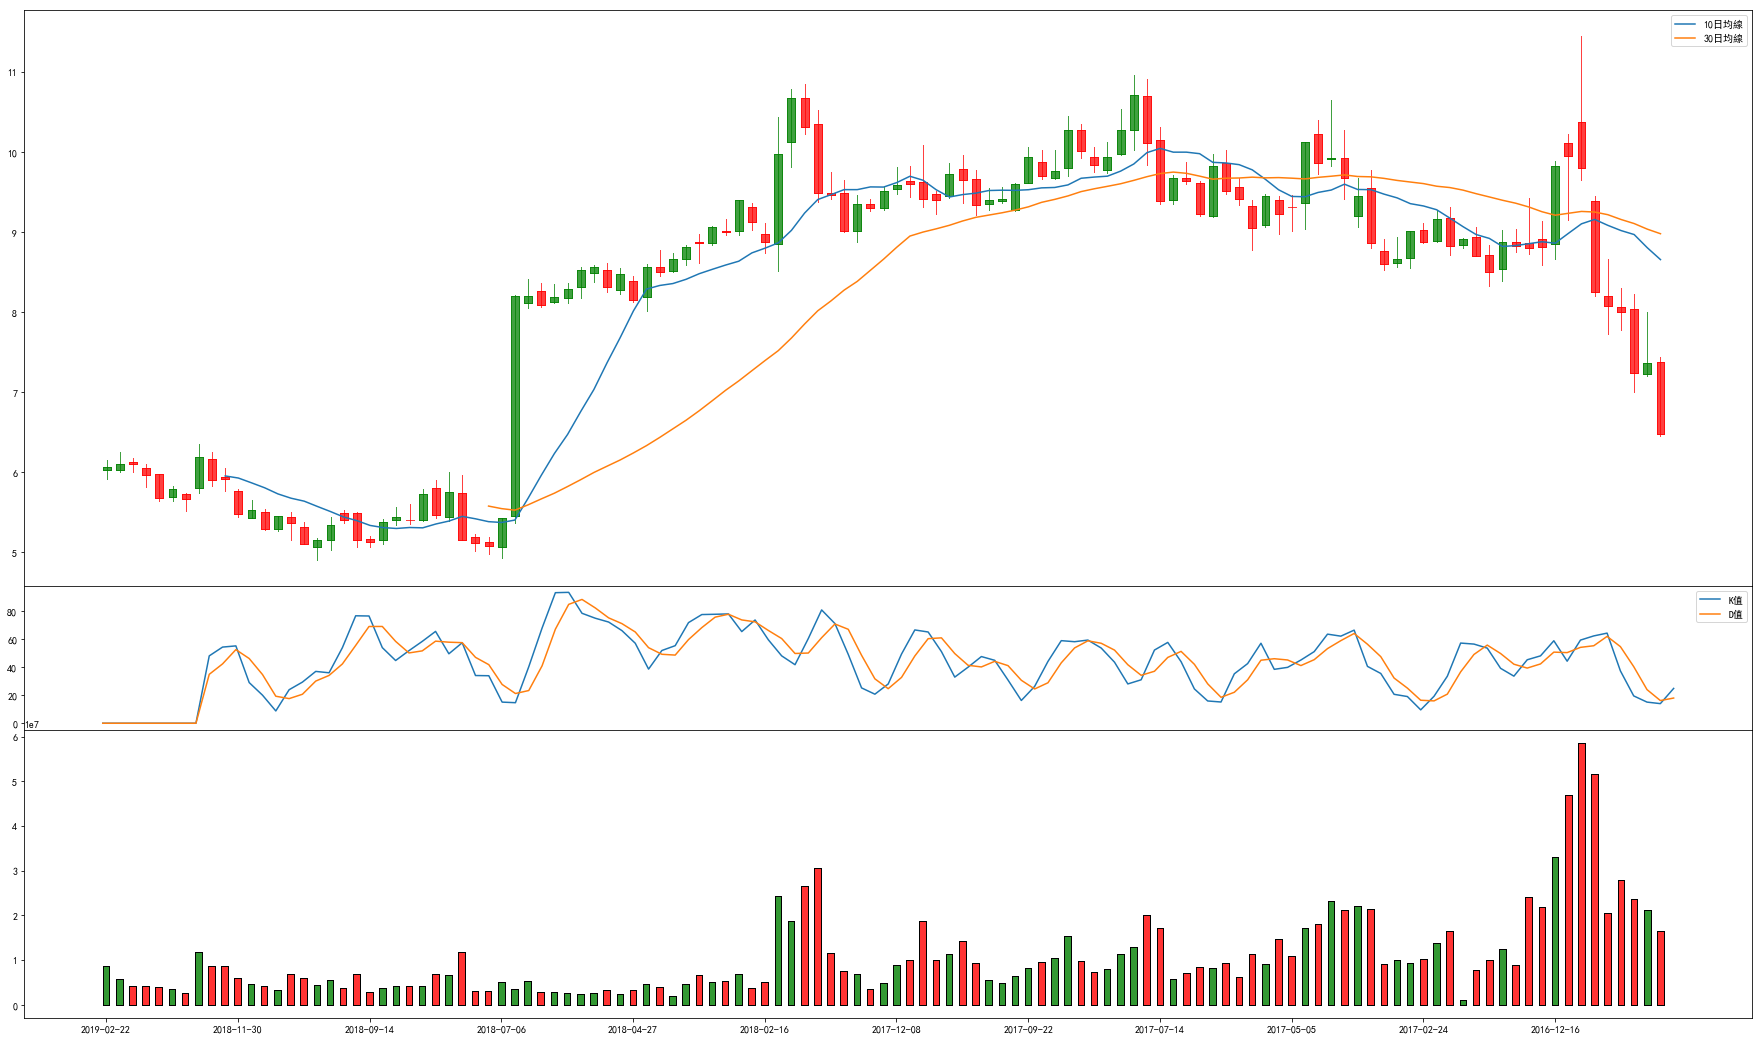

In [7]:
sma_10 = talib.SMA(np.array(df['close']), 10)
sma_30 = talib.SMA(np.array(df['close']), 30)
df['k'], df['d'] = talib.STOCH(df['high'], df['low'], df['close'])
df['k'].fillna(value=0, inplace=True)
df['d'].fillna(value=0, inplace=True)

fig = plt.figure(figsize=(24, 20))
# add_axes([left, bottom, width, height]): left,bottom是相对于左下角原点的相对位置，width,height是相对于figure的宽高比例
ax = fig.add_axes([0,0.3,1,0.4])
ax2 = fig.add_axes([0,0.2,1,0.1])
ax3 = fig.add_axes([0,0,1,0.2])

ax.set_xticks(range(0, len(df.index), 10))
ax.set_xticklabels(df.index[::10])
mpf.candlestick2_ochl(ax, df['open'], df['close'], df['high'],
                      df['low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
#plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')

ax2.plot(df['k'], label='K值')
ax2.plot(df['d'], label='D值')
ax2.set_xticks(range(0, len(df.index), 10))
ax2.set_xticklabels(df.index[::10])

mpf.volume_overlay(ax3, df['open'], df['close'], df['vol'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax3.set_xticks(range(0, len(df.index), 10))
ax3.set_xticklabels(df.index[::10])

ax.legend();
ax2.legend();